In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head(5)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [86]:
df.shape

(404290, 7)

In [4]:
def missingCheck(df):
  missing_val_col = (df.isnull())
  print("These are the missing values: ")
  print(missing_val_col.sum()[missing_val_col.sum() > 0])
print(df.shape)
missingCheck(df)

(404290, 7)
These are the missing values: 
question1    1
question2    2
dtype: int64


In [7]:
cleanDF = df.dropna(axis=0)
cleanDF

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...,...
404285,404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [89]:
print("Ratio of non-duplicates: ", df['is_duplicate'].value_counts()[0]/len(df))

Ratio of non-duplicates:  0.630802146973707


In [90]:
print("Ratio of duplicates: ", df['is_duplicate'].value_counts()[1]/len(df))

Ratio of duplicates:  0.369197853026293


In [8]:
cleanDF = cleanDF.drop(columns=['Unnamed: 0'])
cleanDF

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


<Axes: xlabel='is_duplicate', ylabel='count'>

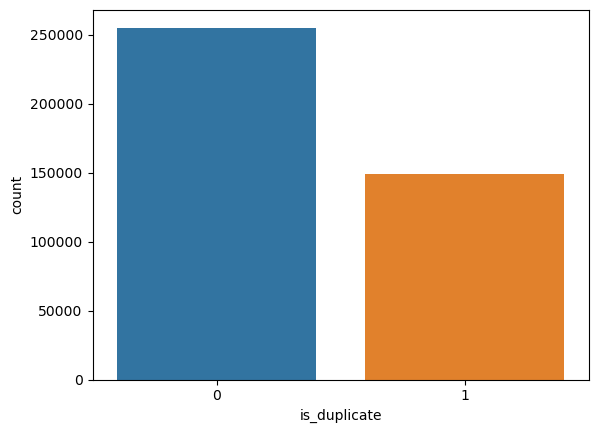

In [30]:
import seaborn as sns
sns.countplot(data=cleanDF,x='is_duplicate')

In [46]:
print("Is qid1 unique? ", cleanDF["qid1"].is_unique)
print("Is qid2 unique? ", cleanDF["qid2"].is_unique)

Is qid1 unique?  False
Is qid2 unique?  False


TOTAL DUPLICATES (qid1): 113635
qid1
8461      50
14110     48
1749      47
20628     47
25984     47
          ..
223037     1
223039     1
223041     1
223043     1
537932     1
Name: count, Length: 290654, dtype: int64


<Axes: ylabel='Frequency'>

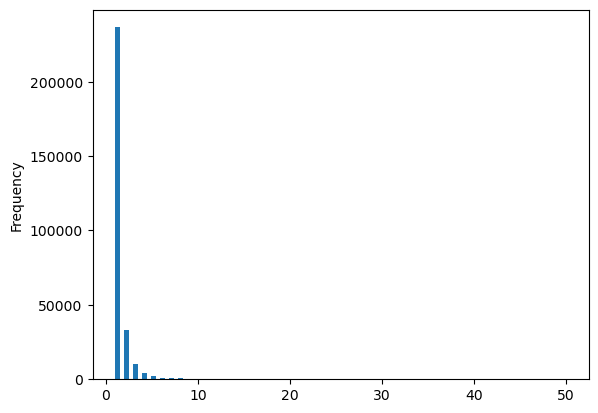

In [16]:
dups = cleanDF['qid1'].duplicated()
dup_count = dups.sum()
print("TOTAL DUPLICATES (qid1):", dup_count)
print(df['qid1'].value_counts())
df['qid1'].value_counts().plot(kind = 'hist', bins=100)

In [61]:
dups = cleanDF['qid2'].duplicated()
dup_count = dups.sum()
print("TOTAL DUPLICATES (qid2):", dup_count)
print(df['qid2'].value_counts())

TOTAL DUPLICATES (qid2): 104925
qid2
30782     120
2559      115
4044      100
2561       71
17978      66
         ... 
221429      1
221433      1
133300      1
221437      1
537933      1
Name: count, Length: 299364, dtype: int64


In [17]:
aver1 = cleanDF['question1'].apply(len).mean()
print("Avg length of string for question 1:", aver1)

aver2 = cleanDF['question2'].apply(len).mean()
print("Avg length of string for question 2:", aver2)

totalAVG = (aver1 + aver2)/2
print("AVG total questions length:", totalAVG)

Avg length of string for question 1: 59.53699723216428
Avg length of string for question 2: 60.1085070754192
AVG total questions length: 59.82275215379174


In [81]:
avgTrueQ1 = cleanDF['question1'][cleanDF.is_duplicate == 1].apply(len).mean()
avgTrueQ2 = cleanDF['question2'][cleanDF.is_duplicate == 1].apply(len).mean()
meanAvgTrue = (avgTrueQ1 + avgTrueQ2)/2
print("Avg length of string of Q1 where is_duplicate is TRUE:", avgTrueQ1)
print("Avg length of string of Q2 where is_duplicate is TRUE:", avgTrueQ2)
print("TOTAL avg:", meanAvgTrue)

Avg length of string of Q1 where is_duplicate is TRUE: 52.84134715234184
Avg length of string of Q2 where is_duplicate is TRUE: 52.93893329224255
TOTAL avg: 52.890140222292196


In [82]:
avgFalseQ1 = cleanDF['question1'][cleanDF.is_duplicate == 0].apply(len).mean()
avgFalseQ2 = cleanDF['question2'][cleanDF.is_duplicate == 0].apply(len).mean()
meanAvgFalse = (avgFalseQ1 + avgFalseQ2)/2
print("Avg length of string of Q1 where is_duplicate is FALSE:", avgFalseQ1)
print("Avg length of string of Q2 where is_duplicate is FALSE:", avgFalseQ2)
print("TOTAL avg:", meanAvgFalse)

Avg length of string of Q1 where is_duplicate is FALSE: 63.455894347198694
Avg length of string of Q2 where is_duplicate is FALSE: 64.30478700043918
TOTAL avg: 63.880340673818935


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Tokenize questions
questions1 = cleanDF['question1'].astype(str).apply(word_tokenize).tolist()
questions2 = cleanDF['question2'].astype(str).apply(word_tokenize).tolist()
labels = cleanDF['is_duplicate'].values

# Combine questions for Word2Vec training
all_questions = questions1 + questions2

# Train Word2Vec model
w2v_model = Word2Vec(all_questions, vector_size=100, window=5, min_count=1, workers=4)

In [45]:
# Function to average Word2Vec vectors for a sentence
def average_word2vec(sentence, model, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in sentence:
        if word in model.wv.index_to_key:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [47]:
# Create feature vectors for the questions
num_features = 100
q1_vectors = np.array([average_word2vec(q, w2v_model, num_features) for q in questions1])
q2_vectors = np.array([average_word2vec(q, w2v_model, num_features) for q in questions2])

In [48]:
# Word2Vec features of question pairs
X = q1_vectors * q2_vectors
y = labels

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data for initial training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# Initialize models
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)


In [50]:
# K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [52]:
nb_accuracies, nb_precisions, nb_recalls, nb_f1s = [], [], [], []
nb_cms = []
for train_index, val_index in kf.split(X, y):
    X_train_kf, X_val_kf = X[train_index], X[val_index]
    y_train_kf, y_val_kf = y[train_index], y[val_index]

    # Train and evaluate Naive Bayes
    nb_model.fit(X_train_kf, y_train_kf)
    y_pred_nb_kf = nb_model.predict(X_val_kf)
    y_prob_nb_kf = nb_model.predict_proba(X_val_kf)[:, 1]
    nb_accuracies.append(accuracy_score(y_val_kf, y_pred_nb_kf))
    nb_precisions.append(precision_score(y_val_kf, y_pred_nb_kf))
    nb_recalls.append(recall_score(y_val_kf, y_pred_nb_kf))
    nb_f1s.append(f1_score(y_val_kf, y_pred_nb_kf))
    nb_cms.append(confusion_matrix(y_val_kf, y_pred_nb_kf))



In [53]:
lr_accuracies, lr_precisions, lr_recalls, lr_f1s = [], [], [], []
lr_cms = []
for train_index, val_index in kf.split(X, y):
    X_train_kf, X_val_kf = X[train_index], X[val_index]
    y_train_kf, y_val_kf = y[train_index], y[val_index]

   # Train and evaluate Logistic Regression
    lr_model.fit(X_train_kf, y_train_kf)
    y_pred_lr_kf = lr_model.predict(X_val_kf)
    y_prob_lr_kf = lr_model.predict_proba(X_val_kf)[:, 1]
    lr_accuracies.append(accuracy_score(y_val_kf, y_pred_lr_kf))
    lr_precisions.append(precision_score(y_val_kf, y_pred_lr_kf))
    lr_recalls.append(recall_score(y_val_kf, y_pred_lr_kf))
    lr_f1s.append(f1_score(y_val_kf, y_pred_lr_kf))
    lr_cms.append(confusion_matrix(y_val_kf, y_pred_lr_kf))

    # ROC curve and AUC for LR
    fpr_lr, tpr_lr, _ = roc_curve(y_val_kf, y_prob_lr_kf)


In [54]:
# Print the average metrics across all folds for Naive Bayes
print(f'Naive Bayes Cross-Validation Performance:')
print(f'Average Accuracy: {np.mean(nb_accuracies)}')
print(f'Average Precision: {np.mean(nb_precisions)}')
print(f'Average Recall: {np.mean(nb_recalls)}')
print(f'Average F1-Score: {np.mean(nb_f1s)}')


Naive Bayes Cross-Validation Performance:
Average Accuracy: 0.6937225334203403
Average Precision: 0.5887920358049723
Average Recall: 0.5651165894215935
Average F1-Score: 0.576705145019911


In [55]:
# Print the average metrics across all folds for Logistic Regression
print(f'Logistic Regression Cross-Validation Performance:')
print(f'Average Accuracy: {np.mean(lr_accuracies)}')
print(f'Average Precision: {np.mean(lr_precisions)}')
print(f'Average Recall: {np.mean(lr_recalls)}')
print(f'Average F1-Score: {np.mean(lr_f1s)}')

Logistic Regression Cross-Validation Performance:
Average Accuracy: 0.720406542583831
Average Precision: 0.6617028186944441
Average Recall: 0.496579826189003
Average F1-Score: 0.5673655254130539


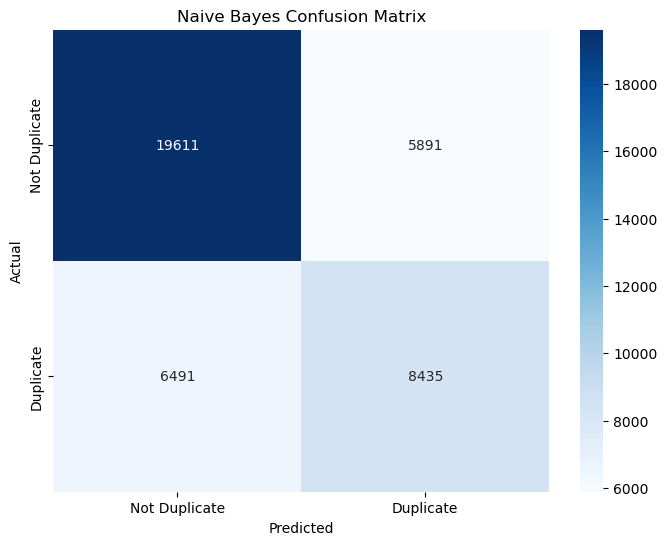

In [58]:
# Plot Confusion Matrices
# For Naive Bayes
mean_cm_nb = np.mean(nb_cms, axis=0).astype(int)
plt.figure(figsize=(8, 6))
sns.heatmap(mean_cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Duplicate', 'Duplicate'], yticklabels=['Not Duplicate', 'Duplicate'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

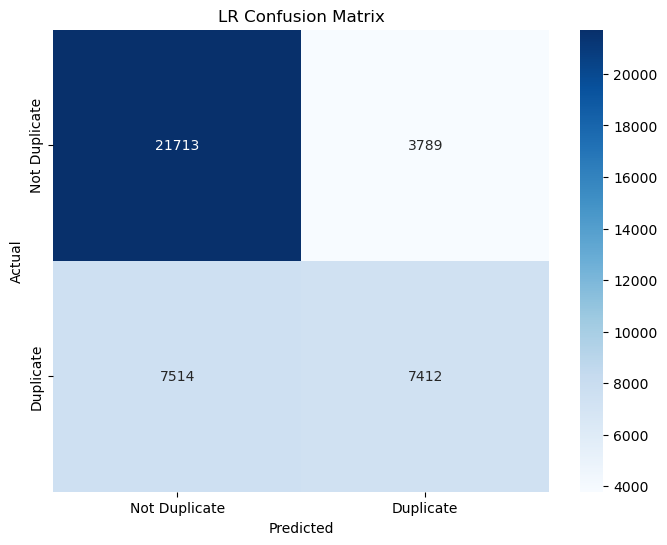

In [59]:
# For LR
mean_cm_lr = np.mean(lr_cms, axis=0).astype(int)
plt.figure(figsize=(8, 6))
sns.heatmap(mean_cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Duplicate', 'Duplicate'], yticklabels=['Not Duplicate', 'Duplicate'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('LR Confusion Matrix')
plt.show()

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge keras-preprocessing

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Lambda, Dense, Concatenate
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming cleanDF is already defined with columns 'question1', 'question2', and 'is_duplicate'
questions1 = cleanDF['question1']
questions2 = cleanDF['question2']
labels = cleanDF['is_duplicate']

# Fill missing values with empty strings
questions1 = questions1.fillna('')
questions2 = questions2.fillna('')

# Tokenize your questions if needed
max_sequence_length = 80
embedding_dim = 300
questions = cleanDF['question1'].astype(str) + ' ' + cleanDF['question2'].astype(str)

tokens = [word for sentence in questions for word in sentence.split()]

# Compute the vocabulary size
vocabulary_size = len(set(tokens))
questions = (questions1 + ' ' + questions2).astype(str)
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(questions)

sequences1 = tokenizer.texts_to_sequences(questions1)
sequences2 = tokenizer.texts_to_sequences(questions2)
padded_sequences1 = pad_sequences(sequences1, maxlen=max_sequence_length)
padded_sequences2 = pad_sequences(sequences2, maxlen=max_sequence_length)

input_layer1 = Input(shape=(max_sequence_length,))
input_layer2 = Input(shape=(max_sequence_length,))

embedding_layer = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim)

lstm_layer = LSTM(units=50)

x1 = embedding_layer(input_layer1)
x1 = lstm_layer(x1)

x2 = embedding_layer(input_layer2)
x2 = lstm_layer(x2)

# Compute the absolute difference between the LSTM outputs
distance_layer = Lambda(lambda x: tf.keras.backend.abs(x[0] - x[1]))([x1, x2])

# Instead of reshaping, use a Dense layer directly on the distance layer
output_layer = Dense(units=1, activation='sigmoid')(distance_layer)

siamese_model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)

siamese_model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint(filepath='siamese_model_weights.keras', save_best_only=True)
]

siamese_model.fit([padded_sequences1, padded_sequences2], labels, epochs=5, batch_size=32, validation_split=0.2, callbacks=callbacks)


Epoch 1/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 2317s 229ms/step - accuracy: 0.6407 - loss: 0.6088 - val_accuracy: 0.7592 - val_loss: 0.5088
Epoch 2/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 1971s 195ms/step - accuracy: 0.7778 - loss: 0.4736 - val_accuracy: 0.7827 - val_loss: 0.4652
Epoch 3/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 1926s 191ms/step - accuracy: 0.8166 - loss: 0.4075 - val_accuracy: 0.7986 - val_loss: 0.4416
Epoch 4/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 1943s 192ms/step - accuracy: 0.8428 - loss: 0.3592 - val_accuracy: 0.8045 - val_loss: 0.4309
Epoch 5/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 1952s 193ms/step - accuracy: 0.8654 - loss: 0.3162 - val_accuracy: 0.8097 - val_loss: 0.4240


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

preds = siamese_model.predict([padded_sequences1, padded_sequences2])
pred_labels = (preds > 0.5).astype(int)

accuracy = accuracy_score(labels, pred_labels)
precision = precision_score(labels, pred_labels)
recall = recall_score(labels, pred_labels)
f1 = f1_score(labels, pred_labels)
roc_auc = roc_auc_score(labels, preds)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC AUC: {roc_auc}')

12634/12634 ━━━━━━━━━━━━━━━━━━━━ 292s 23ms/step
Accuracy: 0.8709134847274337
Precision: 0.8360135963060138
Recall: 0.8090618572586642
F1-score: 0.822316947779132
ROC AUC: 0.940220582226047


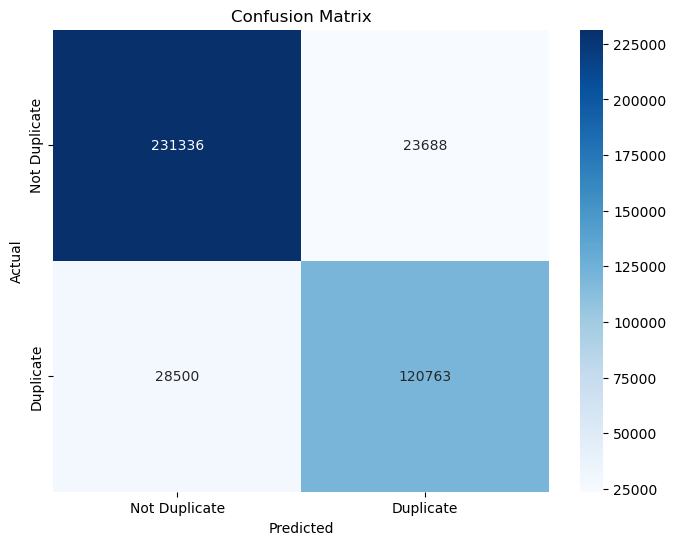

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion Matrix
cm = confusion_matrix(labels, pred_labels)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Duplicate', 'Duplicate'], yticklabels=['Not Duplicate', 'Duplicate'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

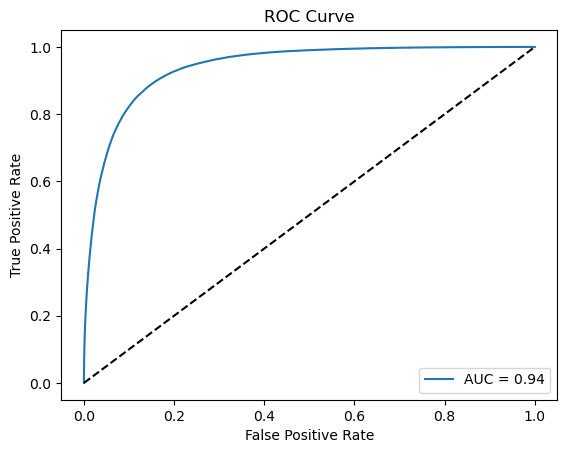

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(labels, preds)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()